In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算
import matplotlib.pyplot as plt


In [2]:
plt.rc('font',family='SimHei')#调节字体、如果要更多字体要下载再放入某个目录

In [3]:
data=pd.read_csv("/Users/xwx/Desktop/kaggle/tatanic/data/train.csv")#加载数据
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


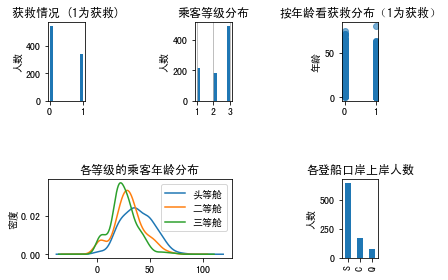

In [8]:
#创建一个图像
fig = plt.figure()
fig.set(alpha=0.2)

#########画第一个子图，
#subplot2grid中（2，3）代表2*3的图纸，（0，0）代表从行列从哪里开始，colspan代表占几个行格子、rowspan代表占几个列格子
plt.subplot2grid((2,3),(0,0))
#画直方图
plt.hist(data.Survived,histtype='bar')
# 标题
plt.title("获救情况 (1为获救)")
#y轴注释 
plt.ylabel("人数") 
#重置x轴刻度
plt.xticks(np.arange(0,2,1))
#np.arange中代表从0到2之间，以1为步长产生一个数组
#类似的有np.linspace(0,2,5)代表从0到2之间等间距产生5个数


########第二个子图
plt.subplot2grid((2,3),(0,1))
plt.hist(data.Pclass)
plt.title("乘客等级分布")
plt.ylabel("人数")
#调节子图之间的距离
plt.subplots_adjust(wspace=0.5,hspace=0.5)
#是否显示网格
plt.grid(b=True, which='major', axis='x') 


#######第三个子图
plt.subplot2grid((2,3),(0,2))
#绘制散点图
#alpha是点的透明度，marker是点的形状
plt.scatter(data.Survived,data.Age,alpha=0.6,marker='o')
plt.title("按年龄看获救分布（1为获救）")
plt.ylabel("年龄")


#######第四个子图
plt.subplot2grid((2,3),(1,0),rowspan=1,colspan=2)
#dataframe.plot不同于plt.plot 前者的kind代表用哪种图将数据可视化展示，kde即密度
data.Age[data.Pclass==1].plot(kind="kde")
data.Age[data.Pclass==2].plot(kind="kde")
data.Age[data.Pclass==3].plot(kind="kde")
plt.title('各等级的乘客年龄分布')
plt.ylabel("密度")

#增加图例，loc代表图例位置
plt.legend(("头等舱",'二等舱','三等舱'),loc=0)
#使用sns也可以画密度板分布曲线，但是要求数据中不允许有空值
#sns.kdeplot(data.PassengerId[data.Pclass==2],color='r',label='头等舱')

plt.subplot2grid((2,3),(1,2))
data.Embarked.value_counts().plot(kind='bar')
plt.title('各登船口岸上岸人数')
plt.ylabel('人数')

fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =3, hspace =1)#调整子图间距

plt.show()



Text(0, 0.5, '人数')

<Figure size 432x288 with 0 Axes>

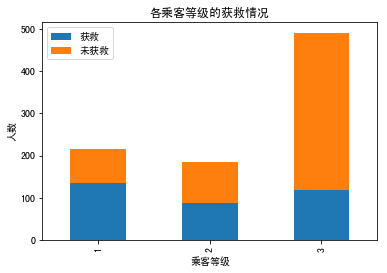

In [34]:
#绘制堆积柱状图

fig=plt.figure()
#准备数据
sur1=data.Pclass[data.Survived==1].value_counts()
sur0=data.Pclass[data.Survived==0].value_counts()
dff=pd.DataFrame({u"获救":sur1,u"未获救":sur0})

#绘制堆积柱状图
dff.plot(kind="bar",stacked=True)#sracked代表是否画成堆积柱状图，默认为False
plt.title("各乘客等级的获救情况")
plt.xlabel("乘客等级")
plt.ylabel("人数")

#是否显示坐标轴
#plt.axis('off') 




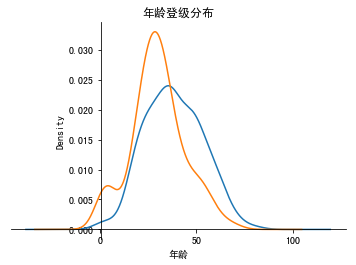

In [9]:
#调节坐标轴位置

#画图
fig=plt.figure()
data.Age[data.Pclass==1].plot(kind="kde")
data.Age[data.Pclass==2].plot(kind="kde")
#设置坐标标注
plt.title('年龄登级分布')
plt.xlabel('年龄')
#重新设置x轴刻度
plt.xticks(np.arange(0,150,50))

#拿到当前图的坐标轴
ax=plt.gca()
#将右边的轴隐藏
ax.spines['right'].set_color('none')
#将上面的轴隐藏
ax.spines['top'].set_color('none')

#将底部设置为x轴，左边设置成y轴
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#将原点设置在（20,0）
ax.spines["bottom"].set_position(("data",0))#将x轴的原点设置在y=0处。
#set_position解释：“data”代表位置类型
#'outward'：将轴从数据区域中移出指定的点数。（负值指定向内放置轴。）
#'axes'：将轴放在指定的Axes坐标处（从0.0到1.0）。
#'data'：将轴放在指定的数据坐标上
ax.spines['left'].set_position(('data',0.2))#将y轴的原点设置在x=20处

#不显示y轴
#ax.get_yaxis().set_visible(False)

#将y轴反向
#ax.invert_yaxis()



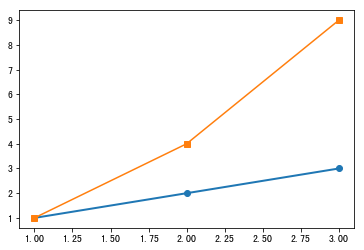

In [10]:
plt.plot([1,2,3], [1,2,3], 'o-', label='line 1', linewidth=2)
plt.plot([1,2,3], [1,4,9], 's-',  label='line 2')
#存储图片
plt.savefig('/Users/xwx/Desktop/learning/test.png')

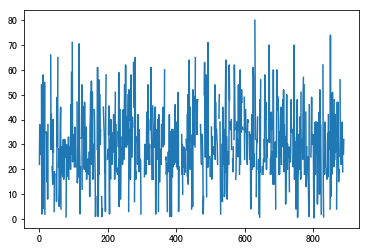

In [4]:
#改动图片的尺寸
fig=plt.figure()
plt.plot(data.Age)


plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
plt.rcParams['image.cmap'] = 'red' # 设置 颜色 style
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
